### 조선일보

### requests 모듈

In [42]:
# #-*-coding:utf-8

# import requests, bs4
# from time import sleep

# head = { 
#     'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/web',
#     'Accept-Encoding' : 'gzip, deflate',
#     'Accept-Language' : 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
#     'Cache-Control': 'no-cache',
#     'Connection':'keep-alive',
#     'Upgrade-Insecure-Requests': '1',
#     'User-Agent' : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36",
# } 
# SITE = 'www' # www(기본 홈페이지), chosunbiz(조선 비즈)
# SECTION = 'politics' # 섹션 : politics(정치), national(사회), international(국제), culture(문화), index(경제) 
# START_WEEK = '20160601' # 시작 주 

# CHOSUN = f"http://news.chosun.com/ranking/list.html?type=&site={SITE}&scode={SECTION}&term=week&date={START_WEEK}"

# res = requests.get(CHOSUN, headers=head)
# res.encoding='utf-8'

# html = res.text

# soup = bs4.BeautifulSoup(html, 'html.parser')
# tags = soup.find_all(True, {'class':['list_inner']})
# tags

[]

### selenium

In [1]:
#-*-coding:utf-8

from selenium import webdriver
from time import sleep
import bs4

import nltk 
from konlpy.tag import Okt; t = Okt()

# 셋팅값
SITE = 'www' # www(기본 홈페이지), chosunbiz(조선 비즈)
SECTION = 'politics' # 섹션 : politics(정치), national(사회), international(국제), culture(문화), index(경제) 
START_WEEK = '20160601' # 시작 주 

# 브라우저 열기 
driver = webdriver.Chrome("C:\chrome\chromedriver.exe")

# 조선, 한겨레 URL
CHOSUN = f"http://news.chosun.com/ranking/list.html?type=&site={SITE}&scode={SECTION}&term=week&date={START_WEEK}"
HAN = "http://www.hani.co.kr/"

### 조선 일보 

In [2]:
# URL로 이동
driver.get(CHOSUN)
sleep(1)

In [3]:
html = driver.page_source
soup = bs4.BeautifulSoup(html, 'html.parser')

In [4]:
RANKING_LIST = ["TOPTITLE" + str(n) for n in range(0,30)]

In [5]:
tags = soup.find_all(True, {"id":RANKING_LIST})

In [6]:
tags[:5]

[<span id="TOPTITLE0">[TV조선 단독] 청바지 차림에 환한 미소… 탈출 北 여종업원 사진 입수</span>,
 <span id="TOPTITLE1">탈북 남매가 일군 카페… "우리 동네 문화센터 됐죠"</span>,
 <span id="TOPTITLE2">'1黨' 더민주, 국정원·검경 손보기부터 나선다</span>,
 <span id="TOPTITLE3">對北 태도 달라진 中, 리수용 일정·의제 파격적 공개</span>,
 <span id="TOPTITLE4">우간다 北과 협력 중단…우상호 "朴대통령, 한가하게 우간다 가서 北 어쩌고 할 때냐?"</span>]

In [8]:
headlines = [t.getText().strip() for t in tags]
headlines[:5]

['[TV조선 단독] 청바지 차림에 환한 미소… 탈출 北 여종업원 사진 입수',
 '탈북 남매가 일군 카페… "우리 동네 문화센터 됐죠"',
 "'1黨' 더민주, 국정원·검경 손보기부터 나선다",
 '對北 태도 달라진 中, 리수용 일정·의제 파격적 공개',
 '우간다 北과 협력 중단…우상호 "朴대통령, 한가하게 우간다 가서 北 어쩌고 할 때냐?"']

In [9]:
all_headlines = []
all_headlines.append(headlines)

In [12]:
all_headlines

[['[TV조선 단독] 청바지 차림에 환한 미소… 탈출 北 여종업원 사진 입수',
  '탈북 남매가 일군 카페… "우리 동네 문화센터 됐죠"',
  "'1黨' 더민주, 국정원·검경 손보기부터 나선다",
  '對北 태도 달라진 中, 리수용 일정·의제 파격적 공개',
  '우간다 北과 협력 중단…우상호 "朴대통령, 한가하게 우간다 가서 北 어쩌고 할 때냐?"',
  '반기문 지지율 31.6% 1위',
  '유승민 "5·16 쿠데타" "친재벌 정책 안된다"',
  '朴 대통령, 어머니 서거 때까지 유학했던 佛 하숙집 딸 편지 받아',
  '케냐 대통령 "한국은 호랑이… 조용히 세계를 덮쳤다"',
  "반기문이 달구자… 꺼졌던 與레이스 '점화'",
  '北 네번째 무수단도 실패… 이번엔 발사대서 폭발',
  '김무성 "대표때 朴대통령과 얘기 한번 못해"',
  '안철수 "여유 있었다면 덜 위험한 일 택했을지도" \'구의역 사고\' 트윗 논란',
  "13명 '탈북' 이후… 러 인력시장서 北근로자 사라져",
  '유엔對北제재대상 16명 베트남, 항공기 탑승 거절',
  '[단독] "연평도 앞바다 불법 침입한 중국어선 2척, 우리 어민이 직접 체포"',
  "국민의당, 동해를 'Sea of Japan'으로 표기한 지도 강연에 썼다가 사과",
  '마음 바뀐 與 "복당시켜 1黨 탈환, 의장직 갖겠다"',
  '침묵 깬 김무성, 朴대통령과 각 세우다',
  '우상호, 安 \'세비 반납\' 발언에 "유치하다..모욕감 느낀다"',
  '軍 "北 탄도 미사일 발사 징후 추적"',
  '"한류스타 샤이니가 소개하니 붕어빵 인기 폭발"…朴대통령, 프랑스 \'K콘\' 참석',
  '중국 탈출 북한식당 종업원 3명, 국내 입국 확인…"평양 출신 20대"',
  "이 환한 웃음, 南北을 잇는 '사다리'입니다",
  "김종인 유승민 김성식 '초당적 의원 모임' 동참한다",
  '"새누리당은 쓸모없는 남자"',
  '박지원 "요즘 朴 대통령 안 보여..구조조정 컨트롤타워에 직접 서라"',
 

URL 이동 후 버튼 클릭

In [13]:
next_button = driver.find_element_by_xpath("//*[@id='btn_next_id']")

In [14]:
next_button.click() # 클릭
sleep(1)

In [141]:
txt = ''.join(headlines)
txt[:100]

'[TV조선 단독] 청바지 차림에 환한 미소… 탈출 北 여종업원 사진 입수탈북 남매가 일군 카페… "우리 동네 문화센터 됐죠"\'1黨\' 더민주, 국정원·검경 손보기부터 나선다對北 태도'

In [142]:
import nltk 
from konlpy.tag import Okt; t = Okt()

In [143]:
tokens_ko = t.morphs(txt)
tokens_ko

['[',
 'TV',
 '조선',
 '단독',
 ']',
 '청바지',
 '차림',
 '에',
 '환한',
 '미소',
 '…',
 '탈출',
 '北',
 '여',
 '종업원',
 '사진',
 '입수',
 '탈북',
 '남매',
 '가',
 '일군',
 '카페',
 '…',
 '"',
 '우리',
 '동네',
 '문화센터',
 '됐죠',
 '"\'',
 '1',
 '黨',
 "'",
 '더',
 '민주',
 ',',
 '국정원',
 '·',
 '검경',
 '손보기',
 '부터',
 '나선다',
 '對北',
 '태도',
 '달라진',
 '中',
 ',',
 '리수용',
 '일정',
 '·',
 '의제',
 '파격',
 '적',
 '공개',
 '우간다',
 '北',
 '과',
 '협력',
 '중단',
 '…',
 '우상호',
 '"',
 '朴',
 '대통령',
 ',',
 '한가하게',
 '우간다',
 '가서',
 '北',
 '어쩌',
 '고',
 '할',
 '때',
 '냐',
 '?"',
 '반기문',
 '지지율',
 '31.6%',
 '1',
 '위유',
 '승민',
 '"',
 '5',
 '·',
 '16',
 '쿠데타',
 '"',
 '"',
 '친',
 '재벌',
 '정책',
 '안된다',
 '"',
 '朴',
 '대통령',
 ',',
 '어머니',
 '서거',
 '때',
 '까지',
 '유학',
 '했던',
 '佛',
 '하숙집',
 '딸',
 '편지',
 '받아',
 '케냐',
 '대통령',
 '"',
 '한국',
 '은',
 '호랑이',
 '…',
 '조용히',
 '세계',
 '를',
 '덮',
 '쳤다',
 '"',
 '반기문',
 '이',
 '달구자',
 '…',
 '꺼졌던',
 '與',
 '레이스',
 "'",
 '점화',
 "'",
 '北',
 '네',
 '번째',
 '무수단',
 '도',
 '실패',
 '…',
 '이번',
 '엔',
 '발사',
 '대',
 '서',
 '폭발',
 '김무성',
 '"',
 '대표',
 '때',
 '朴',


In [144]:
ko = nltk.Text(tokens_ko, name='chosun')
ko.vocab().most_common(10)

[('"', 25),
 ("'", 19),
 (',', 16),
 ('…', 7),
 ('北', 7),
 ('대통령', 7),
 ('朴', 6),
 ('이', 5),
 ('에', 4),
 ('1', 4)]

In [152]:
stop_words = ["'", '"', ',', '','…', '에', '이', '의', '·', '을', '은', '한', '...',
             '가', ']', '도', '들', '1', '는', '?', '로', '에서', '위', '과', '..', '된','서', '앞', '‘','(', '[',
             '\'…', '.', '2', '수', '세', '를', '지난', '자', "때", "못", '""', '…"', '명' ]

tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='chosun')
ko.vocab().most_common(30)

[('北', 7),
 ('대통령', 7),
 ('朴', 6),
 ('반기문', 3),
 ('與', 3),
 ('단독', 2),
 ('환한', 2),
 ('탈출', 2),
 ('종업원', 2),
 ('탈북', 2),
 ('우리', 2),
 ('黨', 2),
 ('對北', 2),
 ('적', 2),
 ('우간다', 2),
 ('우상호', 2),
 ('16', 2),
 ('발사', 2),
 ('대', 2),
 ('폭발', 2),
 ('김무성', 2),
 ('유엔', 2),
 ('중국', 2),
 ('직접', 2),
 ('사람', 2),
 ('TV', 1),
 ('조선', 1),
 ('청바지', 1),
 ('차림', 1),
 ('미소', 1)]

In [148]:
from matplotlib import font_manager, rc 
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt 

%matplotlib inline

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else :
    print('Unknown system. Sooooorry.')

plt.rcParams['axes.unicode_minus'] = False

In [2]:
plt.figure(figsize=(15, 6))
ko.plot(50)
plt.show()

NameError: name 'ko' is not defined

In [150]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

<function matplotlib.pyplot.show(*args, **kw)>

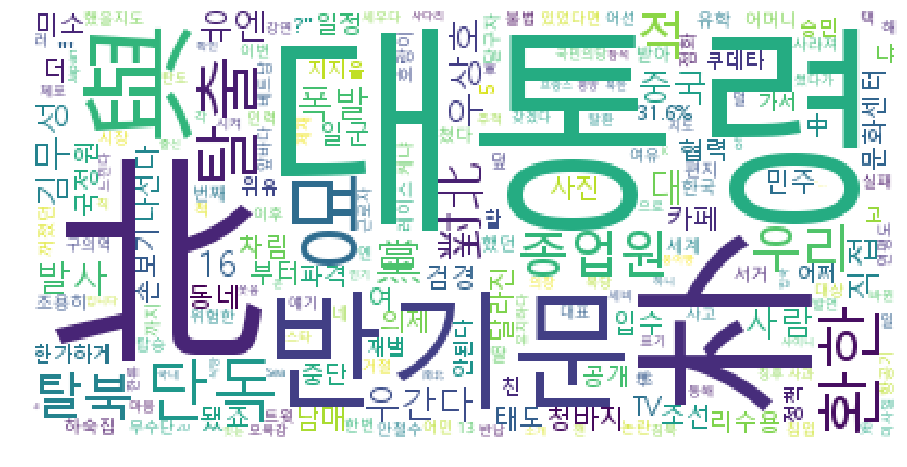

In [151]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.5,
                      background_color='white'
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show

4

In [4]:
#-*-coding:utf-8

from selenium import webdriver
from time import sleep
import bs4

# ==============================
# 조선일보 스크랩 함수 
# ==============================
def scrap_chosun(SECTION, START_WEEK) :
    """
    START_WEEK : 시작 주의 날짜 
    SECTION : politics(정치), national(사회), international(국제), culture(문화), index(경제) 중 하나 
    retrun : all_headlines (52주간의 헤드라인이 주별로 저장된 리스트)
    """
    
    if START_WEEK == '시작 주 날짜':
        print("시작 주 날짜 바꿔주세요.")
    else : 
    
        SITE = 'chosunbiz' if SECTION == 'index' else 'www' 

        URL = f"http://news.chosun.com/ranking/list.html?type=&site={SITE}&scode={SECTION}&term=week&date={START_WEEK}"

        # 브라우저 열고, URL로 이동  
        driver = webdriver.Chrome("C:\chrome\chromedriver.exe")
        driver.get(URL)
        sleep(1)

        # 파싱
        html = driver.page_source
        soup = bs4.BeautifulSoup(html, 'html.parser')

        # 52주의 모든 헤드라인을 저장할 리스트
        all_headlines = []

        for _ in range(52) : 
            # 태그 안의 콘텐츠 가져오기 
            RANKING_LIST = ["TOPTITLE" + str(n) for n in range(0,30)]
            tags = soup.find_all(True, {"id":RANKING_LIST})

            # 다듬기 
            headlines = [t.getText().strip() for t in tags]
            all_headlines.append(headlines)

            # 다음 주로 이동
            next_button = driver.find_element_by_xpath("//*[@id='btn_next_id']")
            next_button.click() # 클릭
            sleep(1)

        driver.close()

        return all_headlines

# ==============================
# MAIN 
# ==============================

SECTIONS = ['politics', 'national', 'international', 'culture', 'index']
SECTION_HEADLINES = {}

# scrap_chosun 함수에 시작 주만 바꿔주세요 
# 혜민 : scrap_chosun(s, '20170601') 
# 지윤 : scrap_chosun(s, '20180601')

for s in SECTIONS : 
    SECTION_HEADLINES[s] = scrap_chosun(s, "20180601")

with open("chosun_2018.data", "w", encoding = "utf-8") as f : 
    f.write(str(SECTION_HEADLINES))

print("끝")

끝
